## WeatherPy

The following journal generates random 500+ cities and analyzes them based on latitude, temperature, humidity, cloudiness, and wind speed.

##### Observations
* Temperatures increase in cities nearer to the equator and decrease in cities farther from the equator, as indicated by the shape of the City Latitude by Temperature Scatter plot.
* There is a stronger negative relationship between temperatures and latitude in the Northern hemisphere than the positive relationship between temperatures and latitude in the Southern hemisphere, indicated by the trend line in the Northern Hemisphere Latitude by Temperature scatter at -.88 and the trend line in the Southern Hemisphere Latitude by Temperature at .62.
* There is no relationship between cloudiness and distance from the equator, as indicated by the trend line in the Northern Hemisphere Latitude by Cloudiness at 0.1 and Southern Hemisphere by Cloudiness at 0.0.
* There is a weak relationship between wind speed and distance from the equator, as indicated by the trend line in the Northern Hemisphere Latitute by Wind Speed at 0.17 and the trend line in the Southern Hemisphere Latitude by Wind Speed at -.26. These trend lines suggest that there is a weak trend that wind speeds increase as the distance from the equater increases.

In [106]:
 # Dependencies
import requests
import json
import random
from citipy import citipy
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import pandas as pd
import scipy.stats as st

In [107]:
#generate random list for latitudes and longitudes in excess of 500 - will need more 

latitude = []
longitude = []

for each_lat in np.random.randint(-90,90,2000):
    latitude.append(each_lat)

for each_lon in np.random.randint(-180,180,2000):
    longitude.append(each_lon)

In [108]:
#Combine latitude and longitude into one tuple

coordinates = tuple(zip(latitude,longitude))

In [109]:
#use citipy library to find the nearest city for all latitudes and longitudes

cities = []
country = []

for lat,lon in coordinates:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)

In [135]:
#Remove duplicates
cities=list(set(cities))
len(cities)

747

In [136]:
# Create lists to hold city data
lat=[]
lon=[]
temps=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

#Create city counter
city_count=1

#Loop through cities to request data and write to lists
for city in cities:
    
    city_name=city
    url=f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&units=IMPERIAL&appid={api_key}'
    response = requests.get(url).json()
    
    try:
        print(f'City number {city_count} is {city_name}')
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temps.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        #Increase the record count
        city_count += 1
        
    except KeyError:
        lat.append(np.nan)
        lon.append(np.nan)
        temps.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(np.nan)
        wind_speed.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        
        print(f'Missing information for {city_name}- skipped')

City number 1 is la ronge
City number 2 is synya
City number 3 is ust-kut
City number 4 is yongzhou
City number 5 is camapua
City number 6 is valjala
Missing information for valjala- skipped
City number 6 is la malbaie
City number 7 is manggar
City number 8 is srednekolymsk
City number 9 is kodiak
City number 10 is kaitangata
City number 11 is doha
City number 12 is bredasdorp
City number 13 is tuatapere
City number 14 is kjopsvik
City number 15 is gold coast
City number 16 is codrington
City number 17 is canton
City number 18 is masumbwe
City number 19 is leningradskiy
City number 20 is shimanovsk
City number 21 is bandarbeyla
City number 22 is beya
City number 23 is port moresby
City number 24 is zyryanka
City number 25 is safaga
City number 26 is severodvinsk
City number 27 is petatlan
City number 28 is zarya
City number 29 is kamenskoye
Missing information for kamenskoye- skipped
City number 29 is ushibuka
City number 30 is progreso
City number 31 is colares
City number 32 is kuche

City number 248 is alta gracia
City number 249 is mercedes
City number 250 is caconda
City number 251 is kholmy
City number 252 is karur
City number 253 is hobart
City number 254 is zaria
City number 255 is coihaique
City number 256 is kunigal
City number 257 is maine-soroa
City number 258 is paamiut
City number 259 is turayf
City number 260 is dromolaxia
City number 261 is esperance
City number 262 is oyo
City number 263 is middle island
City number 264 is dingle
City number 265 is kralendijk
City number 266 is sitka
City number 267 is anjar
City number 268 is jambi
City number 269 is jabiru
Missing information for jabiru- skipped
City number 269 is port hedland
City number 270 is blackwater
City number 271 is avarua
City number 272 is slonim
City number 273 is trelew
City number 274 is ancud
City number 275 is khuchni
City number 276 is stupino
City number 277 is tungkang
Missing information for tungkang- skipped
City number 277 is taldan
City number 278 is swan hill
City number 279 

City number 491 is hervey bay
City number 492 is norman wells
City number 493 is sorvag
Missing information for sorvag- skipped
City number 493 is rikitea
City number 494 is samarai
City number 495 is ziro
City number 496 is lunenburg
City number 497 is itaqui
City number 498 is yian
Missing information for yian- skipped
City number 498 is hauterive
City number 499 is karratha
City number 500 is merauke
City number 501 is khandyga
City number 502 is ruteng
City number 503 is adre
City number 504 is dianopolis
Missing information for dianopolis- skipped
City number 504 is nizhneyansk
Missing information for nizhneyansk- skipped
City number 504 is hithadhoo
City number 505 is tianpeng
City number 506 is shelburne
City number 507 is gat
City number 508 is sentyabrskiy
Missing information for sentyabrskiy- skipped
City number 508 is ust-maya
City number 509 is baiyin
City number 510 is ondangwa
City number 511 is kutum
City number 512 is tromso
City number 513 is chernyy yar
City number 51

In [153]:
#Write lists to data frame
cities_complete = pd.DataFrame(data={"City Name": cities, "Latitude": lat, "Longitude": lon, 
                                         "Temperature": temps, "Humidity": humidity, "Cloudiness": cloudiness, 
                                     "Wind Speed": wind_speed, "Country": country, "Date": date})
                               
#Drop empty rows
cities_complete = cities_complete.dropna()

#Write data frame to csv
cities_complete.to_csv("./citydata.csv", sep=',',index=False)

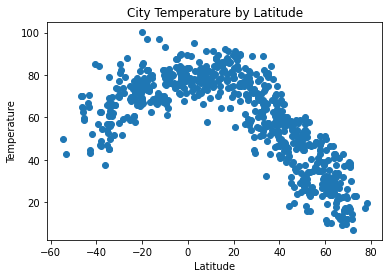

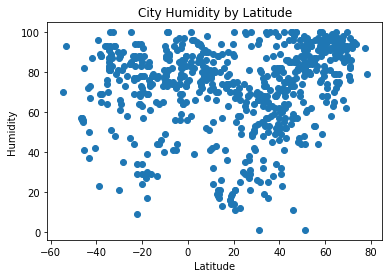

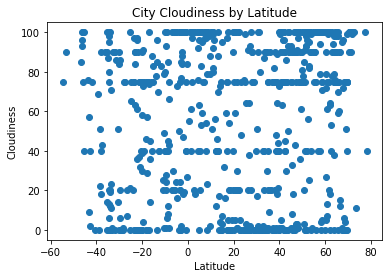

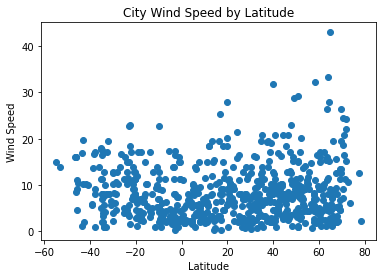

In [162]:
city_data={'Temperature': cities_complete['Temperature'], 'Humidity':  cities_complete['Humidity'], 
           'Cloudiness':  cities_complete['Cloudiness'], 'Wind Speed':  cities_complete['Wind Speed']}

for key, value in city_data.items():
    #Clear plot
    plt.cla()
    
    #Create scatter plots
    title=f"Latitude by {key} Scatter"
    fig_title=f"{value}_scatter"
    fig_title=plt.scatter(cities_complete['Latitude'], value, marker="o")
    
    #Incorporate the other graph properties
    plt.title(f"City {key} by Latitude")
    plt.xlabel("Latitude")
    plt.ylabel(key)

    #Save the figure as PNG
    plt.savefig(f"{title}.png")

    #Show plot
    plt.show()

In [158]:
#Create subsets for northern and souther hemispheres
northern_cities=cities_complete.loc[(cities_complete['Latitude'] > 0)]
southern_cities=cities_complete.loc[(cities_complete['Latitude'] < 0)]

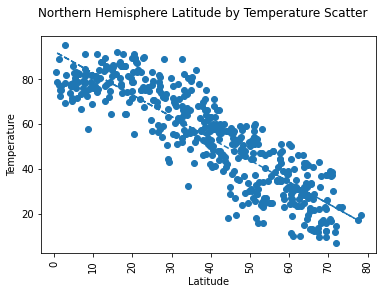

The correlation coefficient between Northern Hemisphere latitude and Temperature is -0.88


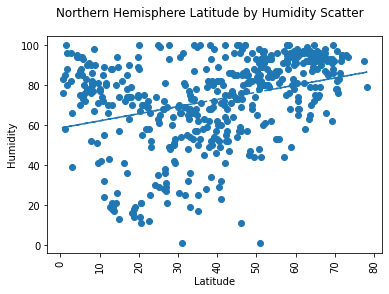

The correlation coefficient between Northern Hemisphere latitude and Humidity is 0.32


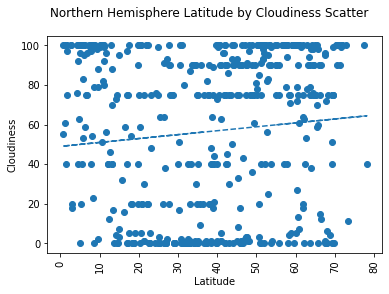

The correlation coefficient between Northern Hemisphere latitude and Cloudiness is 0.1


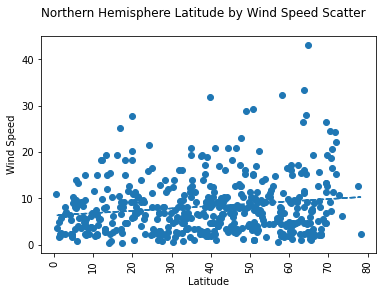

The correlation coefficient between Northern Hemisphere latitude and Wind Speed is 0.17


In [163]:
northern_data={'Temperature': northern_cities['Temperature'], 'Humidity':  northern_cities['Humidity'], 
           'Cloudiness':  northern_cities['Cloudiness'], 'Wind Speed':  northern_cities['Wind Speed']}

for key, value in northern_data.items():
    #Clear plot
    plt.cla()
    
    #Complete linear regression
    slope, city_int, r, p, std_err = st.linregress(northern_cities['Latitude'], northern_cities[key])

    # Create equation of line to calculate predicted violent crime rate
    city_fit = slope * northern_cities['Latitude'] + city_int
    
    #Create scatter plots
    title=f"Northern Hemisphere Latitude by {key} Scatter"
    plt.scatter(northern_cities['Latitude'], northern_cities[key])
    plt.plot(northern_cities['Latitude'], city_fit,"--")
    plt.xticks(rotation=90)
    plt.suptitle(title)
    plt.xlabel('Latitude')
    plt.ylabel(key)

    #Save the figure as PNG
    plt.savefig(f"{title}.png")

    #Show plot
    plt.show()
    print(f"The correlation coefficient between Northern Hemisphere latitude and {key} is {round(st.pearsonr(northern_cities[key], northern_cities['Latitude'])[0],2)}")

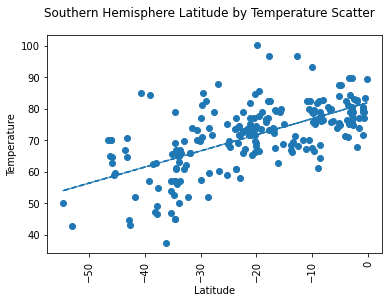

The correlation coefficient between Southern Hemisphere latitude and Temperature is 0.62


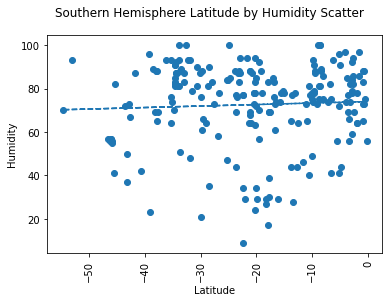

The correlation coefficient between Southern Hemisphere latitude and Humidity is 0.05


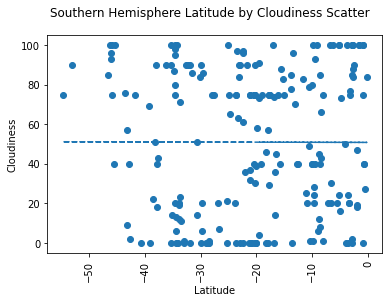

The correlation coefficient between Southern Hemisphere latitude and Cloudiness is -0.0


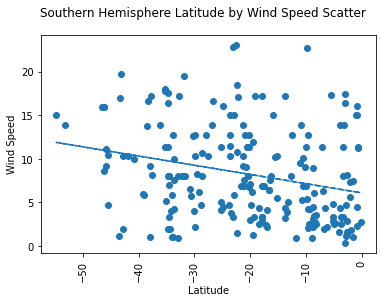

The correlation coefficient between Southern Hemisphere latitude and Wind Speed is -0.26


In [164]:
southern_data={'Temperature': southern_cities['Temperature'], 'Humidity':  southern_cities['Humidity'], 
           'Cloudiness':  southern_cities['Cloudiness'], 'Wind Speed':  southern_cities['Wind Speed']}

for key, value in southern_data.items():
    #Clear plot
    plt.cla()
    
    #Complete linear regression
    slope, city_int, r, p, std_err = st.linregress(southern_cities['Latitude'], southern_cities[key])

    # Create equation of line to calculate predicted violent crime rate
    city_fit = slope * southern_cities['Latitude'] + city_int
    
    #Create scatter plots
    title=f"Southern Hemisphere Latitude by {key} Scatter"
    plt.scatter(southern_cities['Latitude'], southern_cities[key])
    plt.plot(southern_cities['Latitude'], city_fit,"--")
    plt.xticks(rotation=90)
    plt.suptitle(title)
    plt.xlabel('Latitude')
    plt.ylabel(key)

    #Save the figure as PNG
    plt.savefig(f"{title}.png")

    #Show plot
    plt.show()
    print(f"The correlation coefficient between Southern Hemisphere latitude and {key} is {round(st.pearsonr(southern_cities[key], southern_cities['Latitude'])[0],2)}")